# Backtrader Example

In [93]:
import backtrader as bt

import yfinance as yf

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)



In [59]:

# Load data from Yahoo Finance
ticker = 'AAPL'
dataframe = yf.download(ticker, start='2018-01-01', end='2023-04-01')




[*********************100%***********************]  1 of 1 completed


In [60]:
dataframe.columns = dataframe.columns.droplevel(1)
dataframe.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [61]:
dataframe

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,40.524345,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517288,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705490,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168945,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016026,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2023-03-27,156.872009,158.279999,160.770004,157.869995,159.940002,52390300
2023-03-28,156.247604,157.649994,158.490005,155.979996,157.970001,45992200
2023-03-29,159.339859,160.770004,161.050003,159.350006,159.369995,51305700


In [62]:
 # Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname=dataframe)
data

In [65]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])


In [80]:
cerebro = bt.Cerebro()

cerebro.broker.setcash(1_000_000)

# 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)



# Add the data to cerebro
cerebro.adddata(data)

# Add a strategy
#cerebro.addstrategy(TestStrategy)
cerebro.addstrategy(bt.strategies.SMA_CrossOver)

cerebro.addanalyzer(bt.analyzers.SharpeRatio)



print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

test = cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


# Plot the result
cerebro.plot()


Starting Portfolio Value: 1000000.00
Final Portfolio Value: 1000077.36


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 5 Axes>]]

In [95]:
test1 = test[0]


In [97]:
sharp = test1.analyzers[0]


In [98]:
sharp.get_analysis()

OrderedDict([('sharperatio', -389.1827197629283)])

<IPython.core.display.Javascript object>

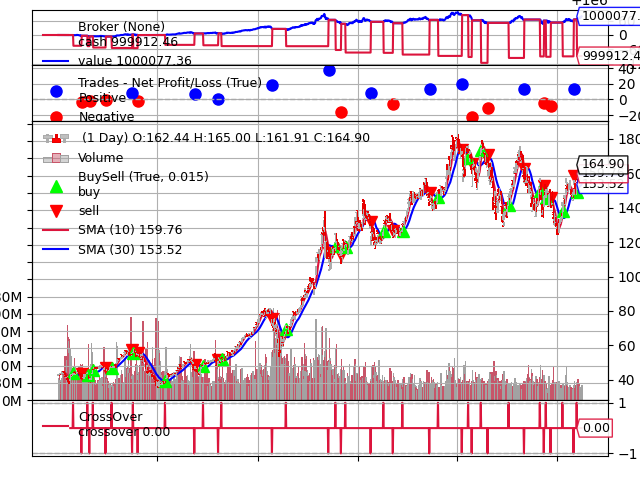

In [108]:
from IPython.display import Image

# Set the path to save the image
img_path = "backtrader_plot.png"

# Generate the plot and save it
fig = cerebro.plot(style="candlestick")[0][0]
fig.savefig(img_path)

# Display the saved image
Image(filename=img_path)
